### Importação dos dados



In [56]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import matplotlib.pyplot
import matplotlib.ticker as ticker


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [57]:
lojas = [loja, loja2, loja3, loja4]
lojasGrafico = ['loja', 'loja2', 'loja3', 'loja4']
listaFaturamento = []

for i, loja in enumerate(lojas, start=1):
  lojasFaturamento = round(sum(loja.Preço), 2)
  listaFaturamento.append(lojasFaturamento)
  print(f'faturamento loja {i} =  R${lojasFaturamento}')

faturamento_total = round(sum(sum(loja.Preço) for loja in lojas), 2)
print(f'Faturamento total = R${faturamento_total}')



faturamento loja 1 =  R$1534509.12
faturamento loja 2 =  R$1488459.06
faturamento loja 3 =  R$1464025.03
faturamento loja 4 =  R$1384497.58
Faturamento total = R$5871490.79


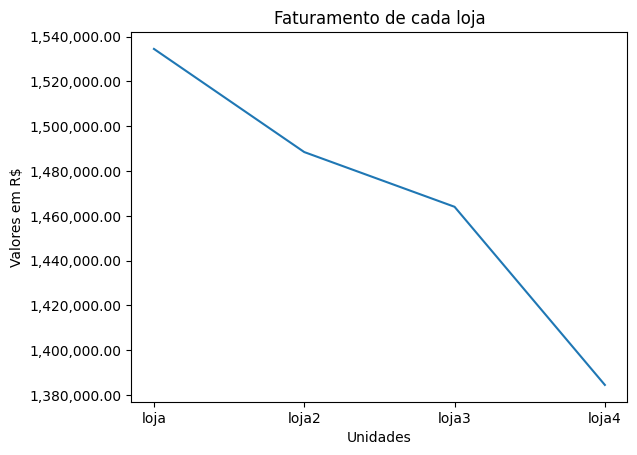

In [58]:
matplotlib.pyplot.plot(lojasGrafico, listaFaturamento)
matplotlib.pyplot.title('Faturamento de cada loja')
matplotlib.pyplot.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.2f}'))
matplotlib.pyplot.ylabel('Valores em R$')
matplotlib.pyplot.xlabel('Unidades')
matplotlib.pyplot.show()

# 2. Vendas por Categoria


In [59]:
for i, loja in enumerate(lojas, start=1):
  lojasCategoria = loja['Categoria do Produto'].value_counts()
  print(f'Vendas por categoria na loja {i}:\n{lojasCategoria}\n\n')

somaTotalCategorias = sum((loja['Categoria do Produto'].value_counts() for loja in lojas))

total_vendas_por_loja = [loja.shape[0] for loja in lojas]

for i, total in enumerate(total_vendas_por_loja, start=1):
    print(f'Total de vendas na Loja {i}: {total} \n')


print('Quantidade total de vendas por categoria:')
print(somaTotalCategorias)

Vendas por categoria na loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


Vendas por categoria na loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


Vendas por categoria na loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


Vendas por categoria na loja 4:
Categoria do Produto
moveis  

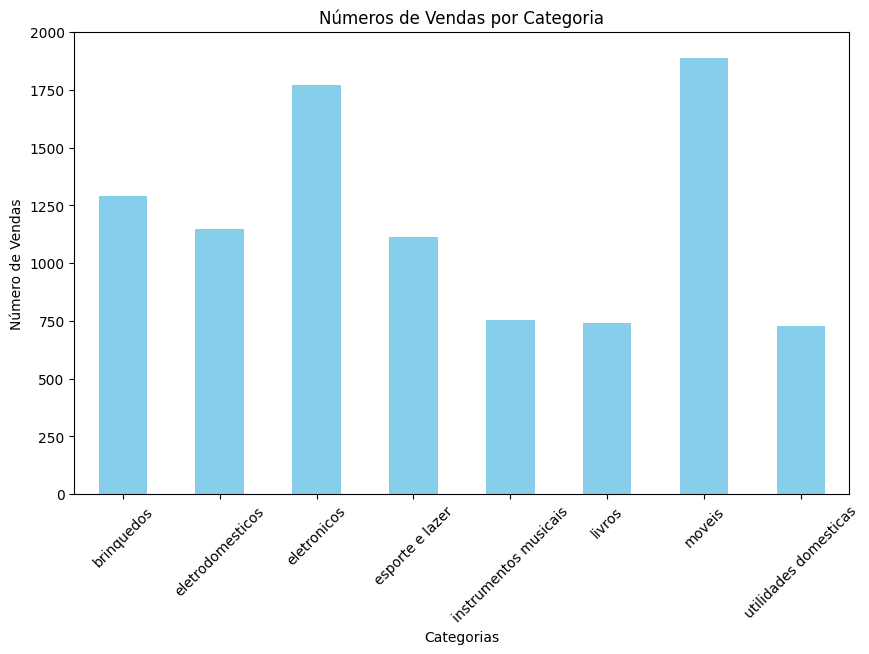

In [60]:
somaTotalCategorias.plot(kind='bar', figsize=(10, 6), color='skyblue')
matplotlib.pyplot.title('Números de Vendas por Categoria')
matplotlib.pyplot.xlabel('Categorias')
matplotlib.pyplot.ylabel('Número de Vendas')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.ylim(0, 2000)
matplotlib.pyplot.show()

# 3. Média de Avaliação das Lojas

In [61]:
listaMedias = []

for i, loja in enumerate(lojas, start=1):
  lojasMedia = round(loja['Avaliação da compra'].mean(), 1)
  listaMedias.append(lojasMedia)
  print(f'Média de avaliação da loja {i}: {lojasMedia}')

Média de avaliação da loja 1: 4.0
Média de avaliação da loja 2: 4.0
Média de avaliação da loja 3: 4.0
Média de avaliação da loja 4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [62]:
for i, loja in enumerate(lojas, start=1):
  lojasMaisVendidos = max(loja['Produto'].value_counts())
  nomeMaisVendidos = loja['Produto'].value_counts().idxmax()
  lojasMenosVendidos = min(loja['Produto'].value_counts())
  nomeMenosVendidos = loja['Produto'].value_counts().idxmin()
  print(f'Produtos que mais e menos venderam na loja {i}:\n{nomeMaisVendidos}: {lojasMaisVendidos}\n{nomeMenosVendidos}: {lojasMenosVendidos}\n\n')


somaTotalProdutos = sum((loja['Produto'].value_counts() for loja in lojas))


Produtos que mais e menos venderam na loja 1:
Micro-ondas: 60
Headset: 33


Produtos que mais e menos venderam na loja 2:
Iniciando em programação: 65
Jogo de tabuleiro: 32


Produtos que mais e menos venderam na loja 3:
Kit banquetas: 57
Blocos de montar: 35


Produtos que mais e menos venderam na loja 4:
Cama box: 62
Guitarra: 33




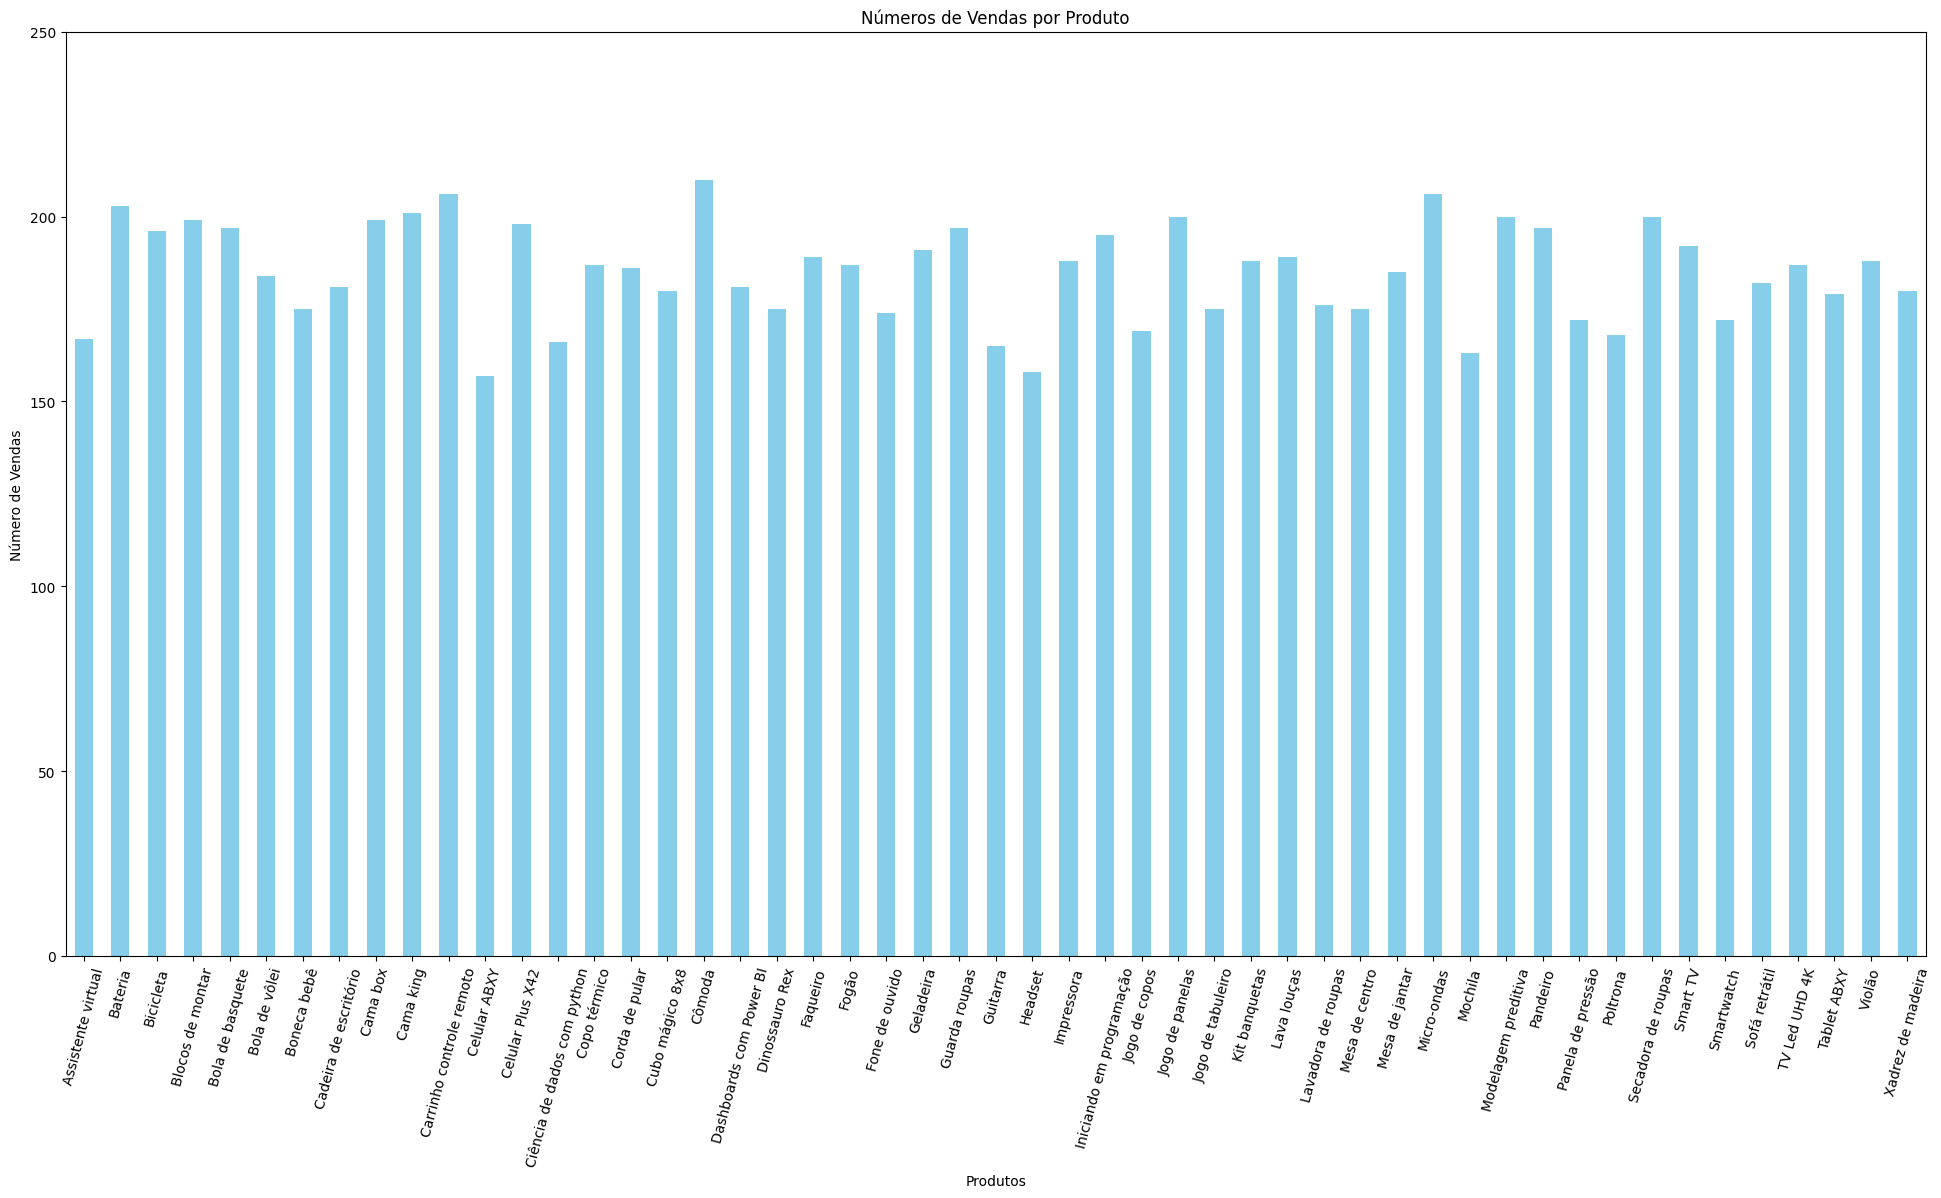

In [63]:
somaTotalProdutos.plot(kind='bar', figsize=(24, 12), color='skyblue')
matplotlib.pyplot.title('Números de Vendas por Produto')
matplotlib.pyplot.xlabel('Produtos')
matplotlib.pyplot.ylabel('Número de Vendas')
matplotlib.pyplot.xticks(rotation=75)
matplotlib.pyplot.ylim(0, 250)
matplotlib.pyplot.show()

# 5. Frete Médio por Loja


In [64]:
listaFrete = []

for i, loja in enumerate(lojas, start=1):
  lojasFrete = round(loja['Frete'].mean(), 2)
  listaFrete.append(lojasFrete)
  print(f'Frete médio da loja {i}: R${lojasFrete}')

Frete médio da loja 1: R$34.69
Frete médio da loja 2: R$33.62
Frete médio da loja 3: R$33.07
Frete médio da loja 4: R$31.28


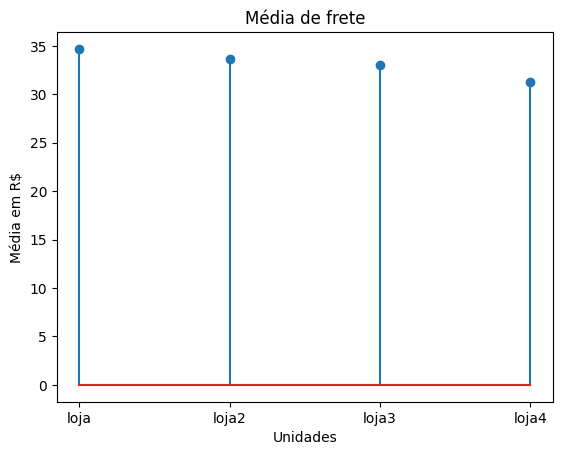

In [65]:
matplotlib.pyplot.stem(lojasGrafico, listaFrete)
matplotlib.pyplot.title('Média de frete')
matplotlib.pyplot.ylabel('Média em R$')
matplotlib.pyplot.xlabel('Unidades')
matplotlib.pyplot.show()

# Mapa de vendas

In [69]:
listaLat = []
listaLon = []

for i,loja in enumerate(lojas, start=1):
  # Append all latitude values from the current DataFrame to listaLat
  listaLat.extend(loja['lat'].tolist())
  # Append all longitude values from the current DataFrame to listaLon
  listaLon.extend(loja['lon'].tolist())

# Zip the lists to create a list of (latitude, longitude) tuples
coordenadas = list(zip(listaLat, listaLon))

mapa = folium.Map(location=[-23.550520, -46.633308], zoom_start=4)
HeatMap(coordenadas).add_to(mapa)
display(mapa)

# Relatório
Após analisar as seguintes informações de desempenho compartilhadas pela franquia Alura Store, a pedido do Senhor João, com o objetivo final de encerrar a operação de uma das lojas, foi possivel concluir as seguintes comparações:

## Análise do Faturamento

- Loja 1: R$1.534.509,12

- Loja 2: R$1.488.459,06

- Loja 3: R$1.464.025,03

- Loja 4: R$1.384.497,58

- Faturamento Total:  R$5.871.490.79

## Vendas por Categoria
### Maior número de vendas:

- Móveis: 1.886

- Eletrônicos: 1.772

- Brinquedos: 1.290

### Menor número de vendas:

- Utilidades Domésticas: 730

- Livros: 742

- Instrumentos Musicais: 753

## Média de Avaliação das Lojas
- Todas as lojas obtiveram a média de avaliação igual a 4.0.

## Produtos Mais e Menos Vendidos
### Os produtos mais vendidos em cada loja foram:

+ Loja 1: Micro-ondas (60 unidades)

+ Loja 2: Iniciando em programação (65 unidades)

+ Loja 3: Kit banquetas (57 unidades)

+ Loja 4: Cama box (62 unidades)

### Os produtos menos vendidos em cada loja foram:

+ Loja 1: Headset (33 unidades)

+ Loja 2: Jogo de tabuleiro (32 unidades)

+ Loja 3: Blocos de montar (35 unidades)

+ Loja 4: Guitarra (33 unidades)

## Frete Médio por Loja
O custo médio do frete variou entre R\$31 e R$34:

- Loja 1: R$34,69

- Loja 2: R$33,62

- Loja 3: R$33,07

- Loja 4: R$31,28

## Conclusão
A loja1 é disparada a que mais se destaca com um faturamento de R\$1534509.12,
as lojas 2 e 3 ficam na com um desempenho euqilibrado faturando consecutivamente R\$1488459.06 e R\$1464025.03, em último fica a loja4 com um faturamento de R$1384497.58, que apesar de ter a menor média de frete, ainda fica atrás das outras lojas em questão de lucro. Logo a loja que deve ter suas operações encerradas pelo Senhor João é a Loja4.